# Problem Statement: 
* Recommend the steps to retain existing telecom customers. In the industry retaining customers is going challenging day by day and acquire new customers is even draining so retaining the existing customers is highly worths every effort than acquiring new customers.
* Know the customer behavior and recommend the steps to retain existing customers and build the model to know which existing customers may leave.
1. Recommend the steps to retain existing telecom customers.
2. Build customer churn, prediction model.


1. Imports
2. Info 
3. Customer Analysis
    1. Steps to retain customers
    2. Hypothesis test (Permutations)
4. Machine Learning Model 
    0. EDA
    1. Feature Engineering 
    2. Decision Tree | Confusion matrix, Classification Report
    3. Random Forest | Confusion matrix, Classification Report
    4. Gradient Boost | Confusion matrix, Classification Report
    5. KNN | Confusion matrix, Classification Report
5. Evaluation AUC ROC Curve for all models 
6. Conclusion


# Imports

In [ ]:
!pip install ptitprince

     |████████████████████████████████| 52 kB 611 kB/s 
  Created wheel for ptitprince: filename=ptitprince-0.2.5-py3-none-any.whl size=8426 sha256=35736726ea4b7e9ee2c3abe5f69efb01d96560f4520da3e53defc8c13fbabfb1
  Stored in directory: /root/.cache/pip/wheels/58/a5/f2/55920bbc5d0e6fb74b2370e1e52e07c236ba7b621236ea5a81
Successfully built ptitprince


In [ ]:
# Customer Analysis and EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince

# Machine Learning
## Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## ML Models Diffrent Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

## Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

## Comparision of Performance of all Algorithms
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Datasets/telecom_churn.csv')
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


# INFO

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [ ]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


# Customer Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a806ab650>,
      dtype=object)

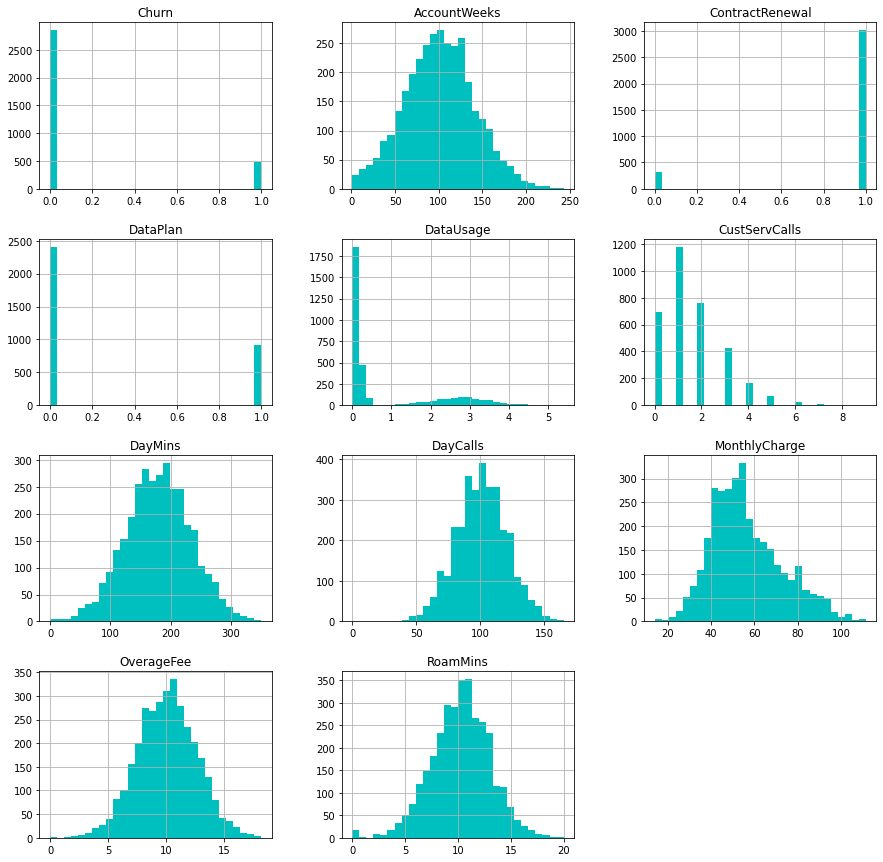

In [ ]:
df.hist(figsize=(15,15), bins=30, color='c')

In [ ]:
sns.pairplot(df, hue="Churn")

Output hidden; open in https://colab.research.google.com to view.

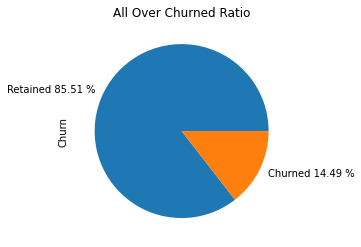

In [ ]:
df["Churn"].value_counts().plot(kind="pie", title="All Over Churned Ratio",
                                labels = ["Retained {:.2f} %".format(len(df.loc[df.Churn==0])*100/len(df.Churn)),
                                          "Churned {:.2f} %".format(len(df.loc[df.Churn==1])*100/len(df.Churn))],
                                figsize=(4,4))

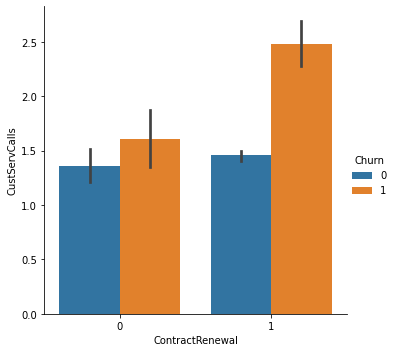

In [ ]:
sns.catplot(x="ContractRenewal", y="CustServCalls", hue="Churn", kind="bar", data=df)

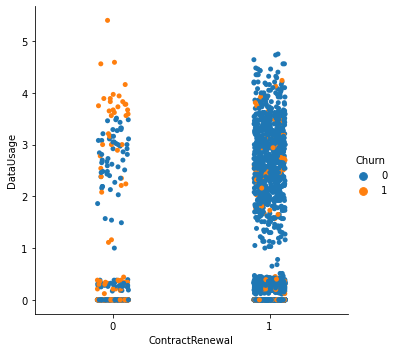

In [ ]:
sns.catplot(x="ContractRenewal", y="DataUsage", hue="Churn", data=df)

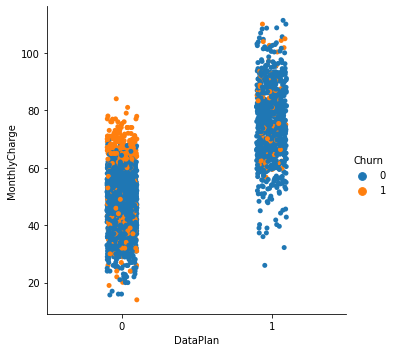

In [ ]:
sns.catplot(x="DataPlan", y="MonthlyCharge", hue="Churn", data=df)

In [ ]:
df1 = df.loc[df["Churn"]==1] # Churned Customers
df0 = df.loc[df["Churn"]==0] # Existing Customers

## 1. Daily Min vs Monthly Charge 

Text(0.5, 1.0, 'Churn=0&1')

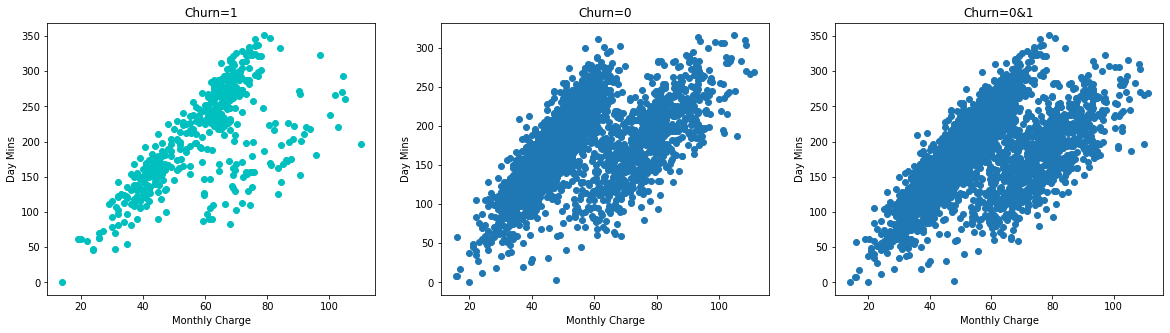

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(df1["MonthlyCharge"], df1["DayMins"], "co")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(df0["MonthlyCharge"], df0["DayMins"], "o")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(df["MonthlyCharge"], df["DayMins"], "o")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=0&1")

## 2. Data Usage vs Monthly Charge

Text(0.5, 1.0, 'Churn=0&1')

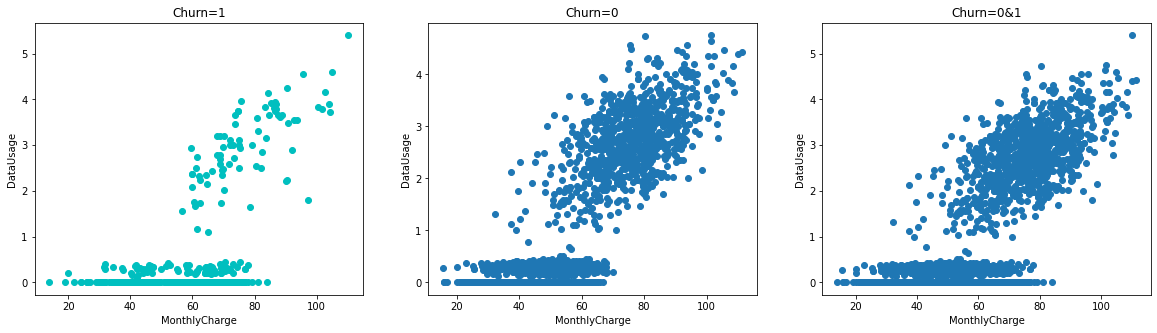

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(df1["MonthlyCharge"], df1["DataUsage"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(df0["MonthlyCharge"], df0["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(df["MonthlyCharge"], df["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0&1")

**In the data usage case also we can easily consider two segments.
Consider the segment as below,**
1. Customers whose data usage is 0-1.
2. Customers whose data usage is >1.

### Manual Customer Segmentation

In [ ]:
# Manual Customer Segmentaion
seg1 = df.loc[df["DataUsage"]<=1] # Segment1
seg2 = df.loc[df["DataUsage"]>1] # Segment2

seg11 = seg1.loc[seg1["Churn"]==1] # Churn Customers from Segment1
seg10 = seg1.loc[seg1["Churn"]==0] # Existing Custoemrs from Segment1

seg21 = seg2.loc[seg2["Churn"]==1] # Churned Custoemrs in segment2.
seg20 = seg2.loc[seg2["Churn"]==0] # Existing Custoemrs in segment2.

### Segment 1. Customers who's  usage is 0-1.

In [ ]:
seg1

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
...,...,...,...,...,...,...,...,...,...,...,...
3326,0,96,1,0,0.36,1,106.6,128,46.6,14.24,14.9
3327,0,79,1,0,0.00,2,134.7,98,40.0,9.49,11.8
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1


In [ ]:
# % of customer churn in seg1 
seg1["Churn"].value_counts(normalize=True) * 100

0    83.347107
1    16.652893
Name: Churn, dtype: float64

In [ ]:
# % of customer having data plan in seg1 
(seg1["DataPlan"].value_counts(normalize=True) * 100)

0    99.628099
1     0.371901
Name: DataPlan, dtype: float64

In [ ]:
# list of customer having data plan in seg1, 9 customers
seg1.loc[seg1["DataPlan"]==1]

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
343,0,98,1,1,0.00,2,64.6,98,26.0,8.81,0.0
383,0,117,0,1,1.00,1,196.0,82,71.0,16.14,3.7
595,0,87,1,1,0.00,1,151.4,95,39.0,7.62,0.0
2906,0,87,1,1,0.00,1,165.8,122,45.0,9.35,0.0
3022,0,123,1,1,0.78,0,146.6,87,42.8,5.74,2.9
3212,0,144,1,1,1.00,0,105.0,86,39.0,6.09,3.7
3216,0,221,1,1,0.65,0,180.5,85,56.5,11.21,2.4
3234,0,75,1,1,0.68,1,200.6,96,55.8,8.21,2.5
3275,0,120,1,1,0.00,1,128.5,115,36.0,8.19,0.0


Text(0.5, 1.0, 'Churn=0&1')

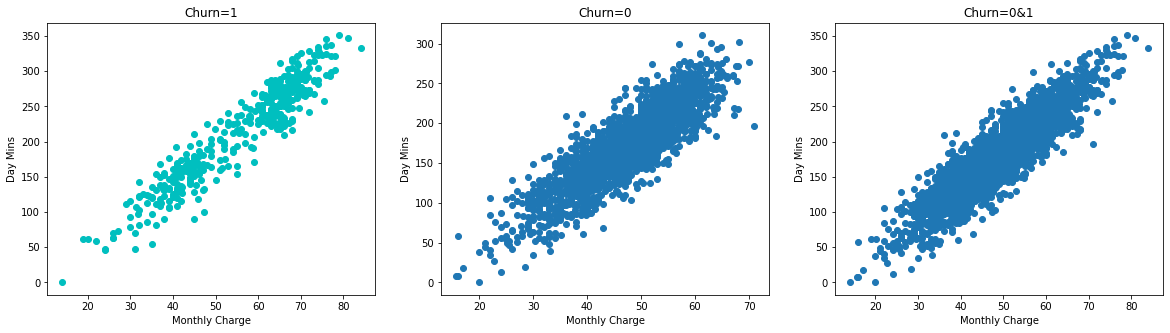

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg11["MonthlyCharge"], seg11["DayMins"], "co")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(seg10["MonthlyCharge"], seg10["DayMins"], "o")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(seg1["MonthlyCharge"], seg1["DayMins"], "o")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=0&1")

Text(0.5, 1.0, 'Churn=0&1')

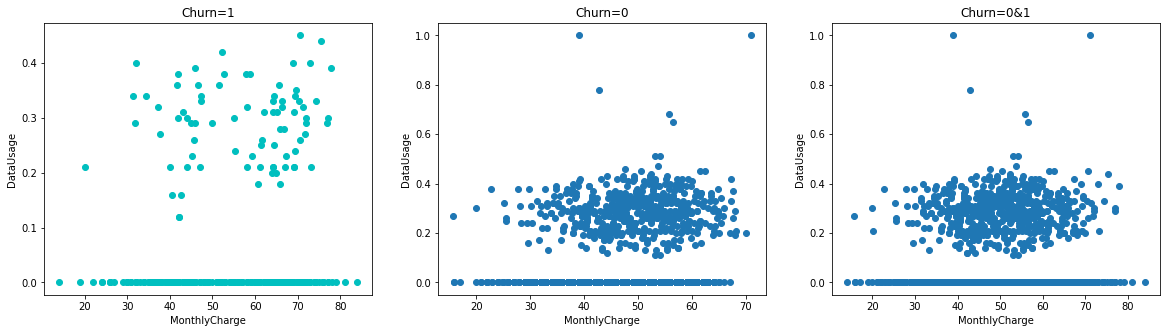

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg11["MonthlyCharge"], seg11["DataUsage"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(seg10["MonthlyCharge"], seg10["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(seg1["MonthlyCharge"], seg1["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0&1")

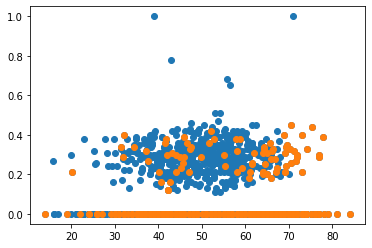

In [ ]:
plt.plot(seg1["MonthlyCharge"], seg1["DataUsage"], "o") # All within seg1
plt.plot(seg11["MonthlyCharge"], seg11["DataUsage"], "o") # Churned within seg1

### More on zero data usage customers

Text(0.5, 1.0, 'Churn=0&1')

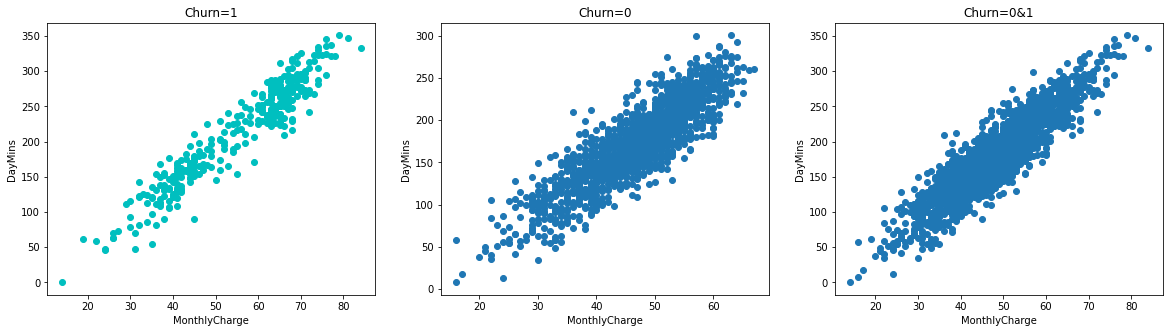

In [ ]:
dataus0 = seg1.loc[seg1["DataUsage"]==0] # Customers with Data Usage zero in seg1.

dataus00 = dataus0.loc[dataus0["Churn"]==0] # Existing Customers with Data Usage zero in seg1.
dataus01 = dataus0.loc[dataus0["Churn"]==1] # Churned Customers with Data Usage zero in seg1.

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(dataus01["MonthlyCharge"], dataus01["DayMins"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DayMins")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(dataus00["MonthlyCharge"], dataus00["DayMins"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DayMins")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(dataus0["MonthlyCharge"], dataus0["DayMins"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DayMins")
plt.title("Churn=0&1")

In [ ]:
dataus0

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.0,0,223.4,98,57.0,11.03,6.3
7,0,147,0,0,0.0,0,157.0,79,36.0,5.16,7.1
...,...,...,...,...,...,...,...,...,...,...,...
3322,1,62,1,0,0.0,4,321.1,105,78.0,13.28,11.5
3324,0,159,1,0,0.0,1,169.8,114,46.0,9.89,11.6
3327,0,79,1,0,0.0,2,134.7,98,40.0,9.49,11.8
3330,0,28,1,0,0.0,2,180.8,109,56.0,14.44,14.1


In [ ]:
# % churn in customers with zero data usage in seg1
dataus0['Churn'].value_counts(normalize=True) * 100

0    82.239382
1    17.760618
Name: Churn, dtype: float64

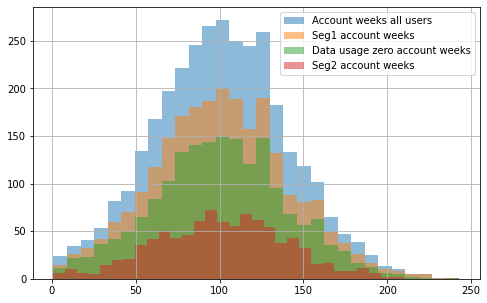

In [ ]:
plt.figure(figsize=(8,5))
df["AccountWeeks"].hist(bins=30, alpha=0.5, label='Account weeks all users')
seg1["AccountWeeks"].hist(bins=30, alpha=0.5, label='Seg1 account weeks')
dataus0["AccountWeeks"].hist(bins=30, alpha=0.5, label='Data usage zero account weeks')
seg2["AccountWeeks"].hist(bins=30, alpha=0.5, label='Seg2 account weeks')
plt.legend()

### Data users within segemet 1

In [ ]:
dataus = seg1.loc[seg1["DataUsage"]>0]
dataus

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
10,1,65,1,0,0.29,4,129.1,137,44.9,11.43,12.7
11,0,74,1,0,0.34,0,187.7,127,49.4,8.17,9.1
13,0,95,1,0,0.44,3,156.6,88,52.4,12.38,12.3
20,0,147,1,0,0.31,0,155.1,117,50.1,11.99,10.6
...,...,...,...,...,...,...,...,...,...,...,...
3320,1,122,0,0,0.30,4,140.0,101,44.0,9.82,9.7
3323,1,117,1,0,0.39,5,118.4,126,45.9,12.47,13.6
3325,0,78,1,0,0.23,2,193.4,99,45.3,5.85,9.3
3326,0,96,1,0,0.36,1,106.6,128,46.6,14.24,14.9


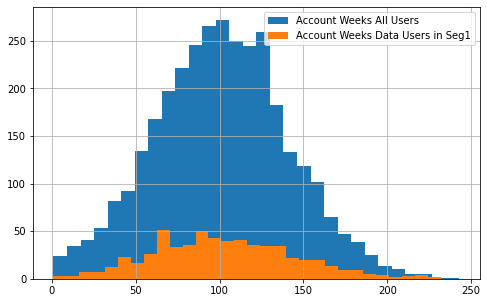

In [ ]:
plt.figure(figsize=(8,5))
df["AccountWeeks"].hist(bins=30, label='Account Weeks All Users')
dataus["AccountWeeks"].hist(bins=30, label='Account Weeks Data Users in Seg1')
plt.legend()

In [ ]:
# % Churn in Custoemrs with data usege in seg1
dataus["Churn"].value_counts(normalize=True) * 100

0    86.655684
1    13.344316
Name: Churn, dtype: float64

### Segment 2. Customers who's data usage is >1.

In [ ]:
seg2

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2
16,0,85,1,1,3.73,1,196.4,139,95.3,14.05,13.8
...,...,...,...,...,...,...,...,...,...,...,...
3306,0,106,1,1,2.19,1,83.6,131,53.9,10.20,8.1
3315,0,149,1,1,1.76,0,148.5,106,52.6,5.73,6.5
3316,0,103,1,1,3.32,0,164.1,111,80.2,10.96,12.3
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9


In [ ]:
# % Churn in seg2.
seg2["Churn"].value_counts(normalize=True) * 100

0    91.237678
1     8.762322
Name: Churn, dtype: float64

In [ ]:
# Every custoemrs has data plan in seg2
seg2["DataPlan"].value_counts()

1    913
Name: DataPlan, dtype: int64

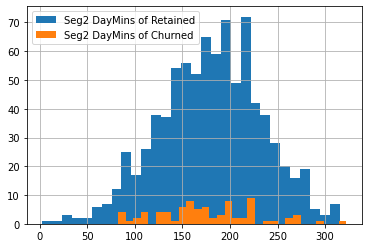

In [ ]:
seg20["DayMins"].hist(bins=30, label='Seg2 DayMins of Retained') 
seg21["DayMins"].hist(bins=30, label='Seg2 DayMins of Churned') 
plt.legend()

### Segment 2 Data Usage

Text(0.5, 1.0, 'Churn=0&1')

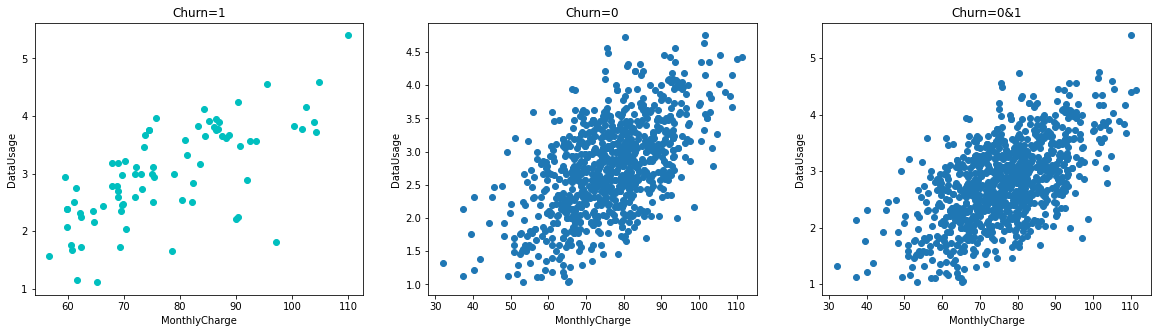

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg21["MonthlyCharge"], seg21["DataUsage"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(seg20["MonthlyCharge"], seg20["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(seg2["MonthlyCharge"], seg2["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0&1")

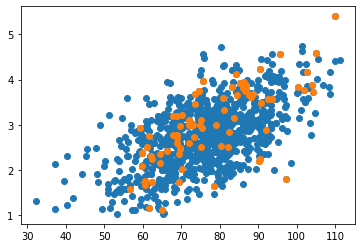

In [ ]:
plt.plot(seg2["MonthlyCharge"], seg2["DataUsage"], "o")
plt.plot(seg21["MonthlyCharge"], seg21["DataUsage"], "o")

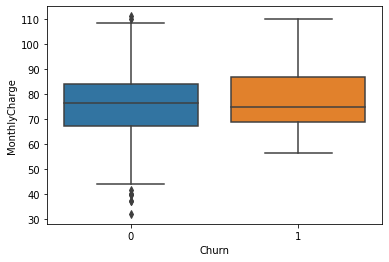

In [ ]:
sns.boxplot(x="Churn", y="MonthlyCharge", data=seg2)

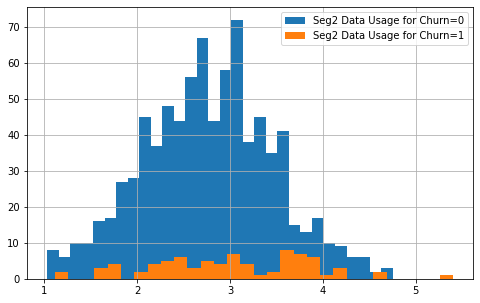

In [ ]:
plt.figure(figsize=(8,5))
seg20["DataUsage"].hist(bins=30, label='Seg2 Data Usage for Churn=0')
seg21["DataUsage"].hist(bins=30, label='Seg2 Data Usage for Churn=1') 
plt.legend()

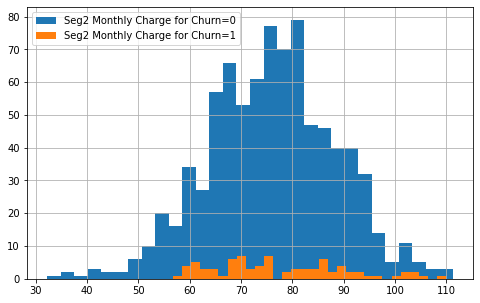

In [ ]:
plt.figure(figsize=(8,5))
seg20["MonthlyCharge"].hist(bins=30, label='Seg2 Monthly Charge for Churn=0') 
seg21["MonthlyCharge"].hist(bins=30, label='Seg2 Monthly Charge for Churn=1') 
plt.legend()

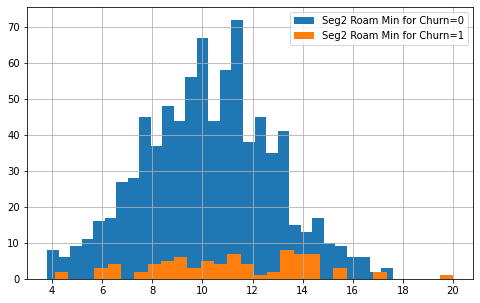

In [ ]:
plt.figure(figsize=(8,5))
seg20["RoamMins"].hist(bins=30, label='Seg2 Roam Min for Churn=0') 
seg21["RoamMins"].hist(bins=30, label='Seg2 Roam Min for Churn=1')
plt.legend() 

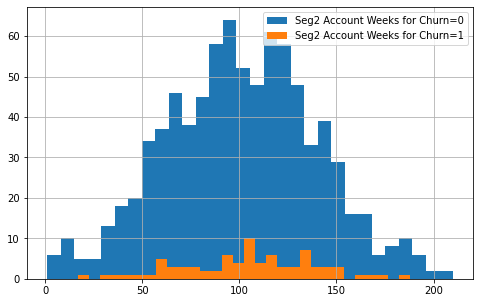

In [ ]:
plt.figure(figsize=(8,5))
seg20["AccountWeeks"].hist(bins=30, label='Seg2 Account Weeks for Churn=0') 
seg21["AccountWeeks"].hist(bins=30, label='Seg2 Account Weeks for Churn=1')
plt.legend() 

## Seg 1 & Seg2 DayMins

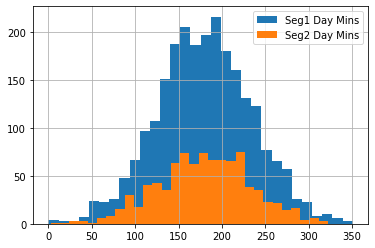

In [ ]:
seg1['DayMins'].hist(bins=30, label='Seg1 Day Mins')
seg2['DayMins'].hist(bins=30, label='Seg2 Day Mins')
plt.legend()

In [ ]:
seg1['DayMins'].mean()

179.71632231404982

In [ ]:
seg2['DayMins'].mean()

179.930887185104

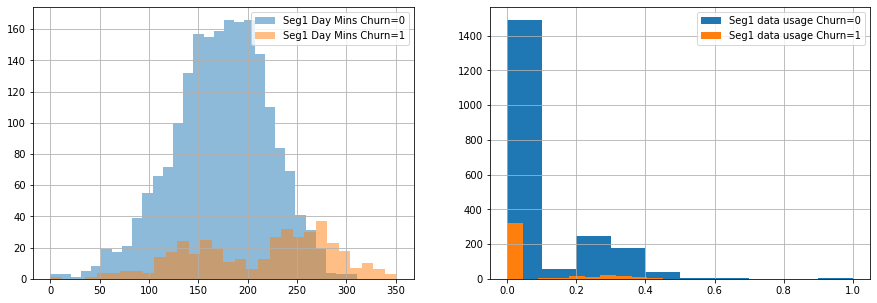

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(121)
seg10["DayMins"].hist(bins=30, alpha=0.5, label='Seg1 Day Mins Churn=0')
seg11["DayMins"].hist(bins=30, alpha=0.5, label='Seg1 Day Mins Churn=1')
plt.legend()

plt.subplot(122)
seg10["DataUsage"].hist(label='Seg1 data usage Churn=0')
seg11["DataUsage"].hist(label='Seg1 data usage Churn=1')
plt.legend()

Text(0.5, 1.0, 'Data Usage Distribution: Seg1 Churned Customers')

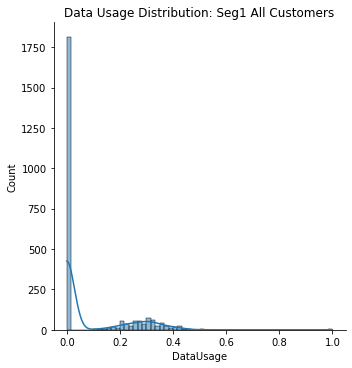

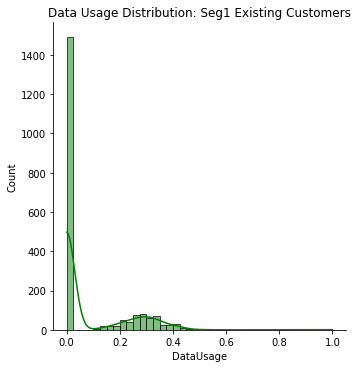

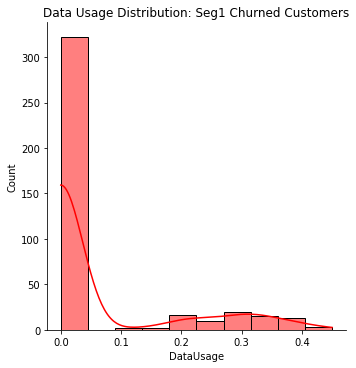

In [ ]:
sns.displot(seg1['DataUsage'],kde=True)
plt.title('Data Usage Distribution: Seg1 All Customers')
sns.displot(seg10['DataUsage'], kde=True, color="g")
plt.title('Data Usage Distribution: Seg1 Existing Customers')
sns.displot(seg11['DataUsage'], kde=True, color="r")
plt.title('Data Usage Distribution: Seg1 Churned Customers')

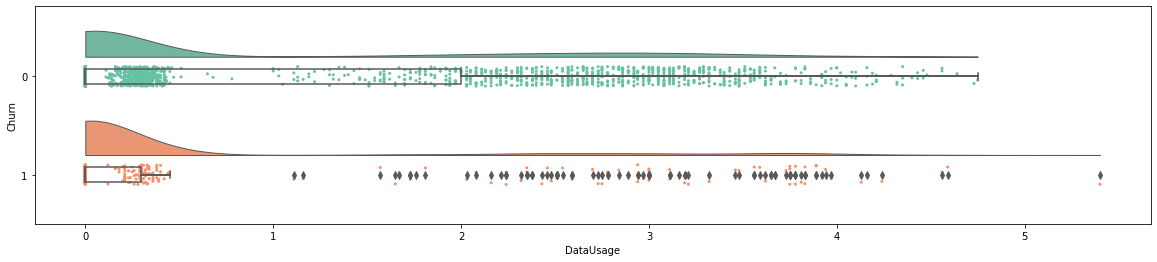

In [ ]:
plt.figure(figsize=(20,4))
ptitprince.RainCloud(data = df, x = 'Churn', y = 'DataUsage', orient = 'h')

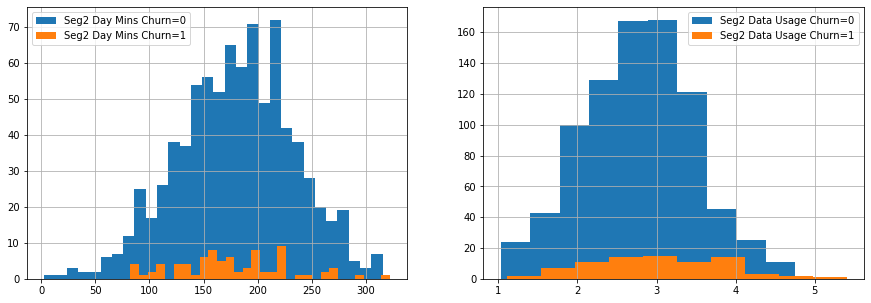

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(121)
seg20["DayMins"].hist(bins=30, label='Seg2 Day Mins Churn=0')
seg21["DayMins"].hist(bins=30, label='Seg2 Day Mins Churn=1')
plt.legend()

plt.subplot(122)
seg20["DataUsage"].hist(label='Seg2 Data Usage Churn=0')
seg21["DataUsage"].hist(label='Seg2 Data Usage Churn=1')
plt.legend()

## Seg1 & Seg2 Monthly Charges

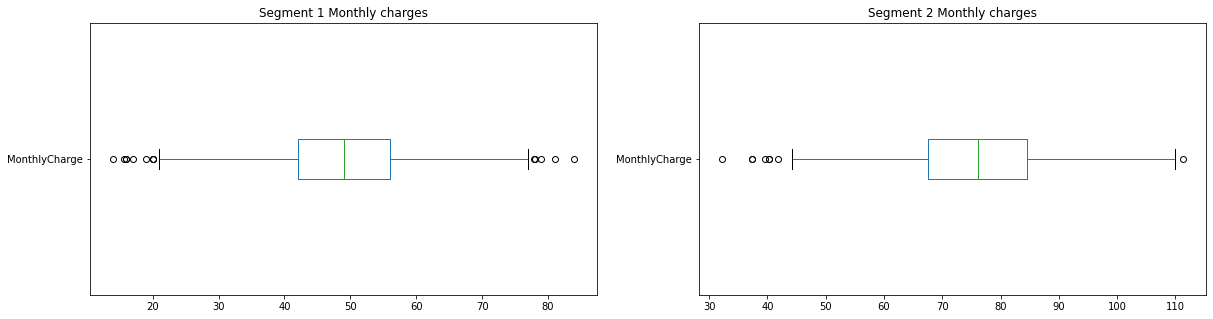

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
seg1["MonthlyCharge"].plot(kind="box", vert=False, title="Segment 1 Monthly charges")
plt.subplot(122)
seg2["MonthlyCharge"].plot(kind="box", vert=False, title="Segment 2 Monthly charges")

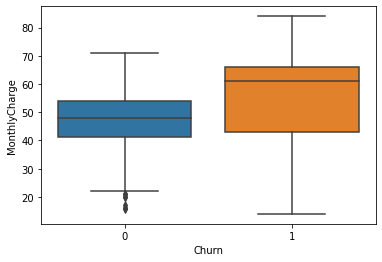

In [ ]:
sns.boxplot(x="Churn", y="MonthlyCharge", data=seg1)

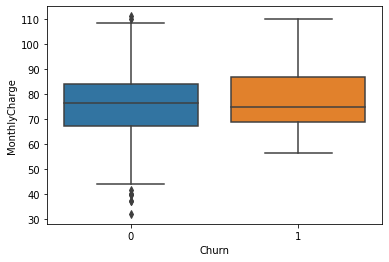

In [ ]:
sns.boxplot(x="Churn", y="MonthlyCharge", data=seg2)

### SUM of Monthly Charges seg1 & 2

Sum of Monthly Charge in seg1 = 118104.1
Sum of Monthly Charge in seg2 = 69561.0


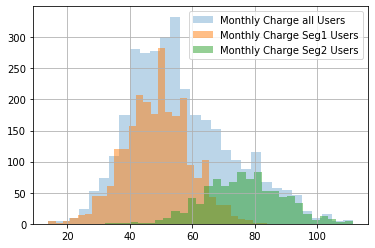

In [ ]:
df["MonthlyCharge"].hist(bins=30, alpha=0.3, label='Monthly Charge all Users') 
seg1["MonthlyCharge"].hist(bins=30, alpha=0.5, label='Monthly Charge Seg1 Users') 
seg2["MonthlyCharge"].hist(bins=30, alpha=0.5,label='Monthly Charge Seg2 Users') 
plt.legend()

print("Sum of Monthly Charge in seg1 =", seg1["MonthlyCharge"].sum())
print("Sum of Monthly Charge in seg2 =", seg2["MonthlyCharge"].sum())

## Roaming

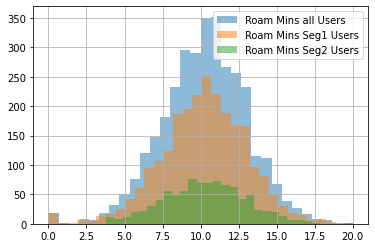

In [ ]:
df["RoamMins"].hist(bins=30, alpha=0.5, label='Roam Mins all Users')
seg1["RoamMins"].hist(bins=30, alpha=0.5, label='Roam Mins Seg1 Users')
seg2["RoamMins"].hist(bins=30, alpha=0.5, label='Roam Mins Seg2 Users')
plt.legend()

20426.3 mins, per 2017 customers who not churned.
4276.5 mins, per 403 customers who churned.


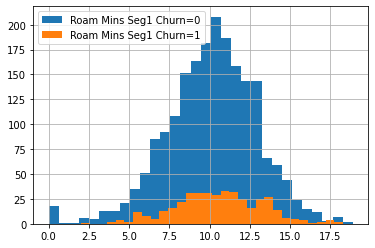

In [ ]:
seg10["RoamMins"].hist(bins=30, label='Roam Mins Seg1 Churn=0')
seg11["RoamMins"].hist(bins=30, label='Roam Mins Seg1 Churn=1') 
plt.legend()

print(f"{seg10.RoamMins.sum()} mins, per {len(seg10.RoamMins)} customers who not churned.")
print(f"{seg11.RoamMins.sum()} mins, per {len(seg11.RoamMins)} customers who churned.")

8526.5 mins, per 833 customers who not churned.
891.6000000000001 mins, per 80 customers who churned.


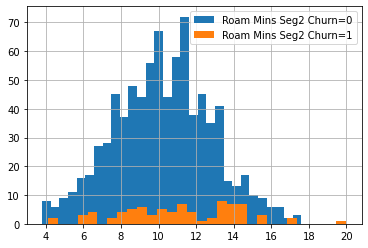

In [ ]:
seg20["RoamMins"].hist(bins=30, label='Roam Mins Seg2 Churn=0')
seg21["RoamMins"].hist(bins=30, label='Roam Mins Seg2 Churn=1')
plt.legend()

print(f"{seg20.RoamMins.sum()} mins, per {len(seg20.RoamMins)} customers who not churned.")
print(f"{seg21.RoamMins.sum()} mins, per {len(seg21.RoamMins)} customers who churned.")

## Customer Service Calls

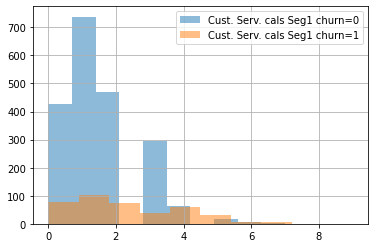

In [ ]:
seg10["CustServCalls"].hist(alpha=0.5, label='Cust. Serv. cals Seg1 churn=0')
seg11["CustServCalls"].hist(alpha=0.5, label='Cust. Serv. cals Seg1 churn=1')
plt.legend()

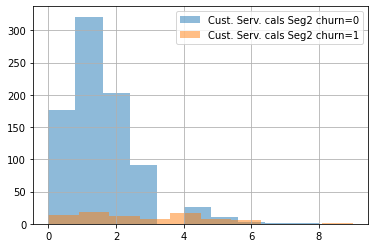

In [ ]:
seg20["CustServCalls"].hist(alpha=0.5, label='Cust. Serv. cals Seg2 churn=0')
seg21["CustServCalls"].hist(alpha=0.5, label='Cust. Serv. cals Seg2 churn=1')
plt.legend()

## Contract Renewal

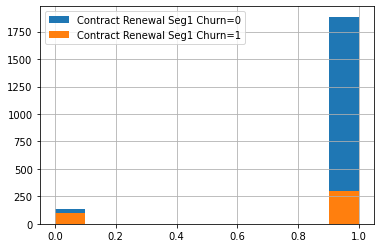

In [ ]:
seg10["ContractRenewal"].hist(label='Contract Renewal Seg1 Churn=0') 
seg11["ContractRenewal"].hist(label='Contract Renewal Seg1 Churn=1')
plt.legend() 

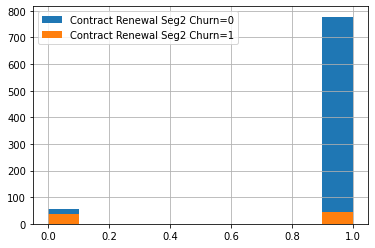

In [ ]:
seg20["ContractRenewal"].hist(label='Contract Renewal Seg2 Churn=0')
seg21["ContractRenewal"].hist(label='Contract Renewal Seg2 Churn=1')
plt.legend()

## Steps to Retain Customers
* More Customer Service calls mean the customer is more prone to churn.
* Optimise price of talk time for segment 1 customers.
* Introduce data plan to those customers who are using data without data plans ASAP.
* Introduce exciting data plans to segment 1 customers.
* If possible optimising price of data plans can retain segment 2 customers also.

## Hypothesis Test

**Null Hypothesis:** Which customers are using data without subscribing to data plan are more prone to churn.

**Alternate Hypothesis:** Which customers are using data without subscribing to data plan are not prone to churn.


In [ ]:
# Permutation
sample = df.sample(n=50)
sample['Churn'].value_counts(normalize=True) * 100

0    88.0
1    12.0
Name: Churn, dtype: float64

In [ ]:
sample = df.sample(n=50)
sample.loc[(sample['DataPlan']==0)&(sample['DataUsage']>0)]['Churn'].value_counts(normalize=True) * 100

0    71.428571
1    28.571429
Name: Churn, dtype: float64

**Permutation Test** 
* In this test random sample of 50 customers will be taken.
* That 50 customers will be in two groups.
* Group2: Customers which are using data without subscribing data plan.
* Group1: All remaining Customers which are not in Group2
* Find the churn ratio in both groups.
* If the null hypothesis is acceptable then Churn Ratio of (Group2 > Group1) in >5% of number of the permutation experiments.

In [ ]:
# 1000 Permutations
# churn in only customers using data without dataplan 

population_churn = []   # Remaining customers (not in Group2) churn % in sample (Group 1)
no_data_plan_churn = []   # Churn % in data users, without data plan (Group 2)

for i in range(0,1000):
  sample = df.sample(n=10)
  sample_churn = sample.loc[~(sample['DataPlan']==0)&(sample['DataUsage']>0)]['Churn'].value_counts(normalize=True)
  sample_churn_data_plan = sample.loc[(sample['DataPlan']==0)&(sample['DataUsage']>0)]['Churn'].value_counts(normalize=True)
  population_churn.append(sample_churn)
  no_data_plan_churn.append(sample_churn_data_plan)

In [ ]:
population_churn = pd.DataFrame(population_churn)
no_data_plan_churn = pd.DataFrame(no_data_plan_churn)

In [ ]:
population_churn[1].mean()

0.40338263058527374

In [ ]:
no_data_plan_churn[1].mean()

0.5123587570621464

Distplot shows lower density than next plot means a null hypothesis is going right.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


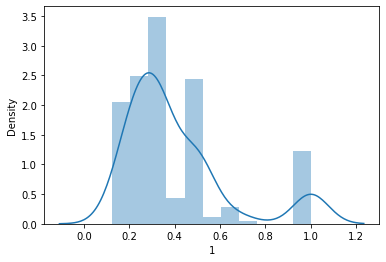

In [ ]:
sns.distplot(population_churn[1])

Distplot shows higher density than the previous plot means a null hypothesis is going right.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


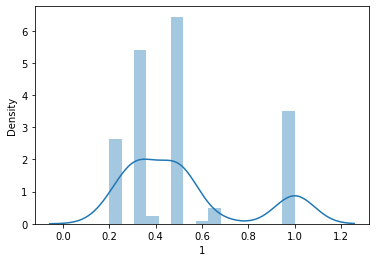

In [ ]:
sns.distplot(no_data_plan_churn[1])

In [ ]:
permutation_results = pd.concat([population_churn, no_data_plan_churn], axis=1, ignore_index=True)
permutation_results.reset_index(drop=True, inplace=True)

In [ ]:
dff = permutation_results
dff.fillna(0, inplace=True)
dff['Result'] = dff[3] - dff[1]
dff

,0,1,2,3,Result
0,1.000000,0.000000,1.0,0.0,0.000000
1,1.000000,0.000000,1.0,0.0,0.000000
2,1.000000,0.000000,1.0,0.0,0.000000
3,1.000000,0.000000,0.0,0.0,0.000000
4,0.000000,0.000000,1.0,0.0,0.000000
...,...,...,...,...,...
995,1.000000,0.000000,1.0,0.0,0.000000
996,1.000000,0.000000,1.0,0.0,0.000000
997,0.000000,0.000000,0.0,1.0,1.000000
998,0.333333,0.666667,1.0,0.0,-0.666667


In [ ]:
len(dff.loc[dff['Result']>=0]) * 100 / len(dff)

80.5

In [ ]:
len(dff.loc[dff['Result']<0]) * 100 / len(dff)

19.5

* More than 80% of experiments are in favor of the null hypothesis.
* Null hypothesis accepted.
* All conclusions on customer analysis are going right.

# Machine Learning Model

## EDA

In [ ]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


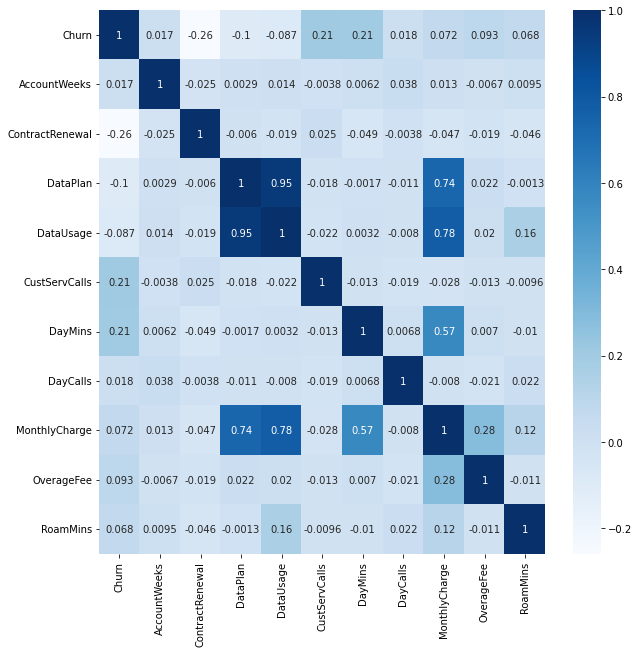

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

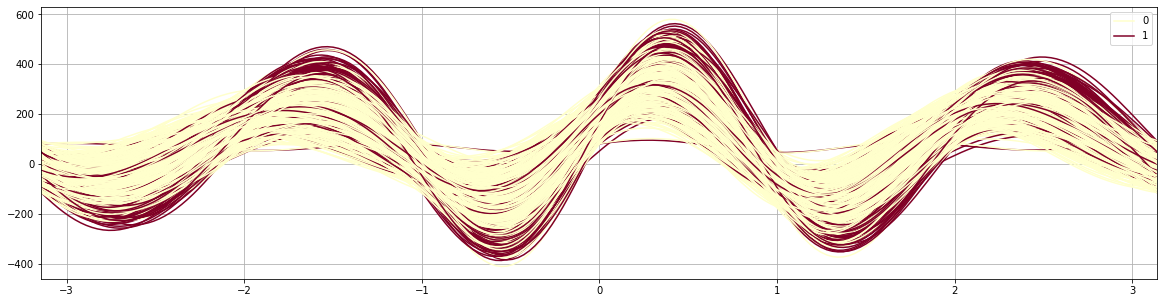

In [ ]:
plt.figure(figsize=(20,5))
pd.plotting.andrews_curves(df, 'Churn', colormap='YlOrRd')

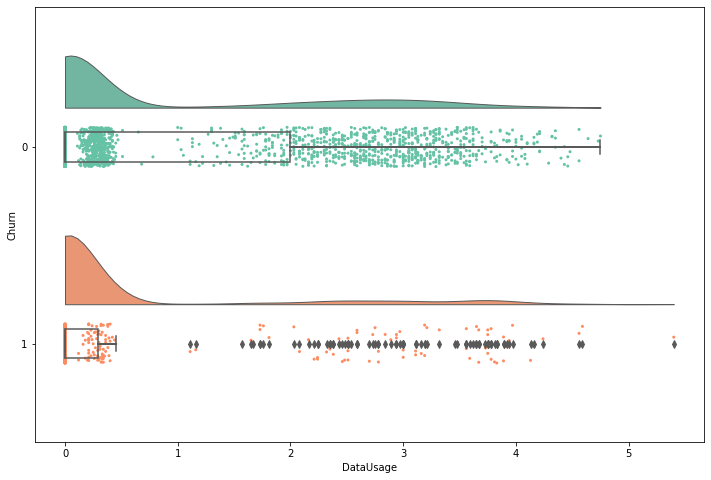

In [ ]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df, x = 'Churn', y = 'DataUsage', orient = 'h')

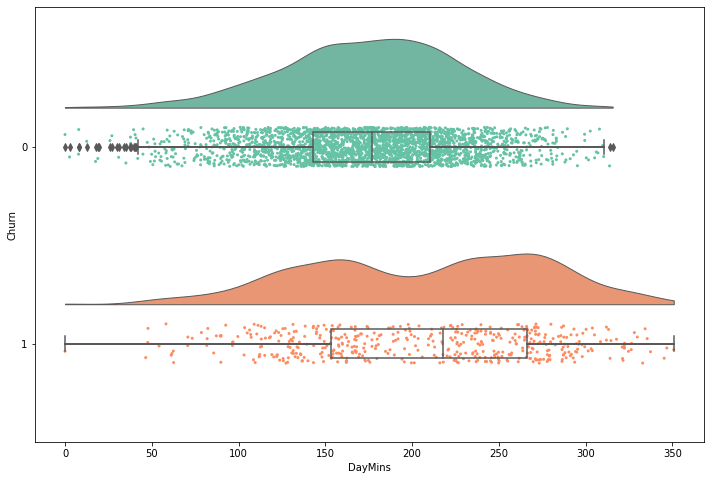

In [ ]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df, x = 'Churn', y = 'DayMins', orient = 'h')

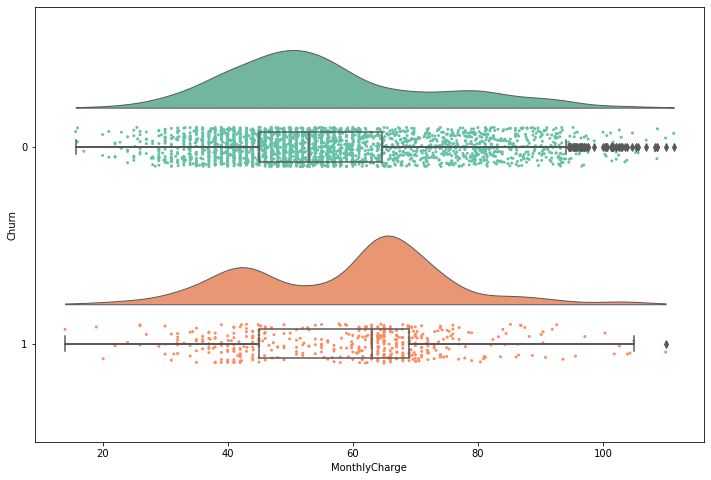

In [ ]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df, x = 'Churn', y = 'MonthlyCharge', orient = 'h')

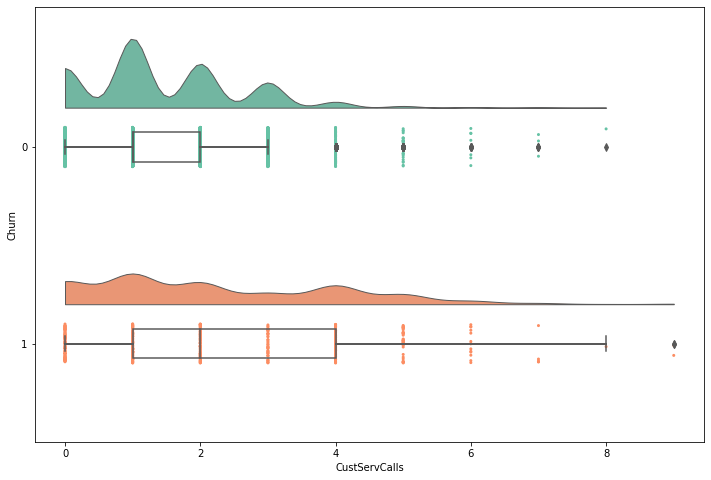

In [ ]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df, x = 'Churn', y = 'CustServCalls', orient = 'h')

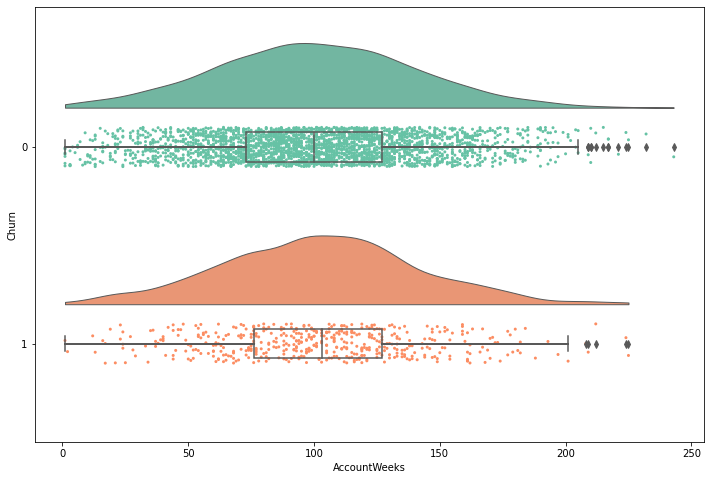

In [ ]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df, x = 'Churn', y = 'AccountWeeks', orient = 'h')

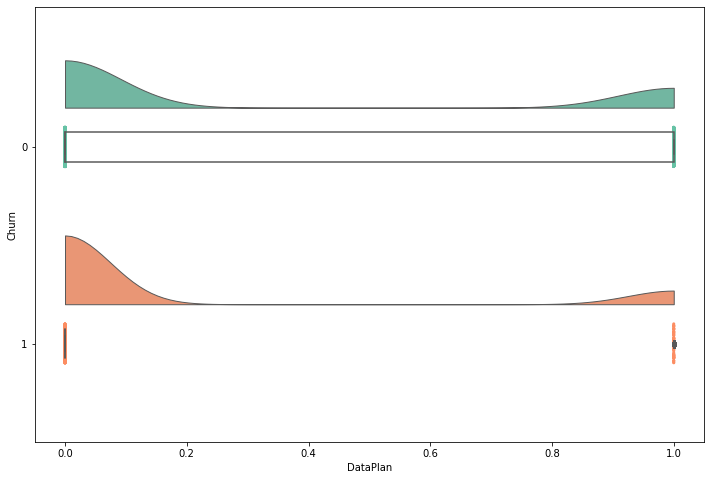

In [ ]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df, x = 'Churn', y = 'DataPlan', orient = 'h')

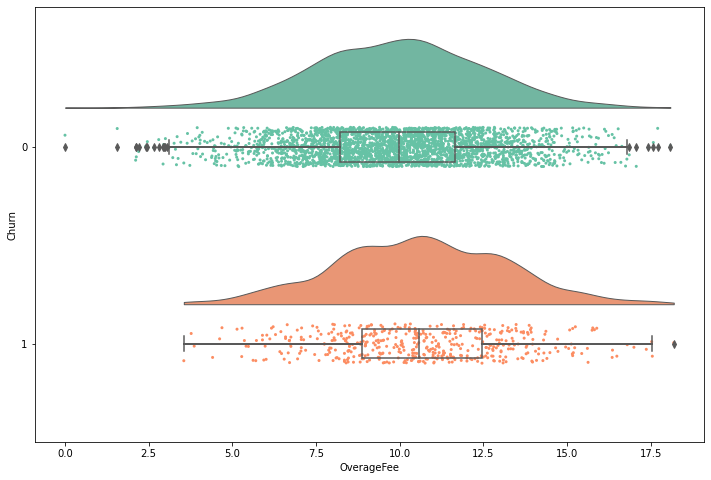

In [ ]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df, x = 'Churn', y = 'OverageFee', orient = 'h')

In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Feature Engineering

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.81498972,  0.32388048, -0.61444668, ..., -0.07520216,
        -0.03472422, -0.29709755],
       [ 0.76425984,  0.32388048,  1.62748051, ...,  0.74902185,
         0.6321183 , -0.29709755],
       [-0.33870811,  0.32388048,  1.62748051, ...,  0.21389134,
         0.45850249, -0.26121768],
       ...,
       [-0.86512463,  0.32388048, -0.61444668, ..., -0.97323726,
         1.20031547, -0.3688573 ],
       [ 1.71682307,  0.32388048, -0.61444668, ..., -0.62878544,
        -0.51216768, -0.11769819],
       [-1.61714823,  0.32388048,  1.62748051, ..., -0.98553911,
        -1.41970484, -0.58413653]])

In [ ]:
X_test = scaler.fit_transform(X_test)
X_test

array([[ 0.27279233,  0.3350143 , -0.62642243, ..., -0.08790331,
         2.55851252,  1.15848864],
       [-0.8877333 ,  0.3350143 , -0.62642243, ..., -1.10258963,
         0.32780258,  0.9084995 ],
       [-0.10563994,  0.3350143 , -0.62642243, ..., -2.53508797,
        -0.8111995 , -1.23426457],
       ...,
       [-0.6102163 ,  0.3350143 , -0.62642243, ..., -1.34133935,
         0.27656719,  0.19424481],
       [-0.96341975,  0.3350143 , -0.62642243, ..., -0.98321477,
        -0.70478754,  0.72993583],
       [ 0.97919923,  0.3350143 , -0.62642243, ...,  0.32990871,
         0.658862  , -1.51996645]])

## Decision Tree 

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       940
           1       0.90      0.49      0.64       160

    accuracy                           0.92      1100
   macro avg       0.91      0.74      0.80      1100
weighted avg       0.92      0.92      0.91      1100



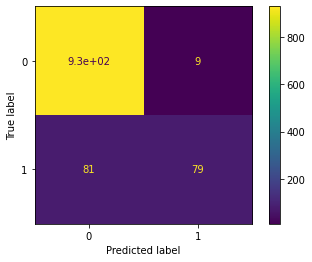

In [ ]:
clfd = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=3)
clfd.fit(X_train, y_train)

pd = clfd.predict(X_test)
print(classification_report(y_test, pd))
plot_confusion_matrix(clfd, X_test, y_test) 

## Random Forest

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       940
           1       0.89      0.63      0.74       160

    accuracy                           0.93      1100
   macro avg       0.91      0.81      0.85      1100
weighted avg       0.93      0.93      0.93      1100



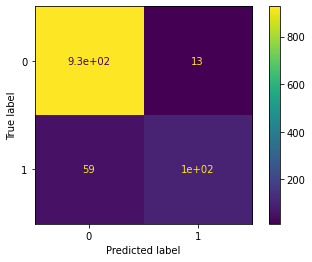

In [ ]:
clfr = RandomForestClassifier(n_estimators=100, random_state=0)
clfr.fit(X_train, y_train)

pr = clfr.predict(X_test)
print(classification_report(y_test, pr))
plot_confusion_matrix(clfr, X_test, y_test)  

## Gradient Boosting

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       940
           1       0.83      0.66      0.74       160

    accuracy                           0.93      1100
   macro avg       0.89      0.82      0.85      1100
weighted avg       0.93      0.93      0.93      1100



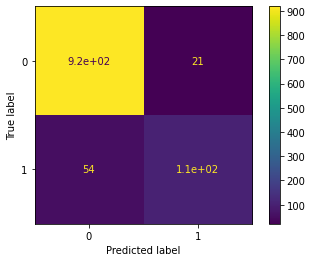

In [ ]:
clfg = GradientBoostingClassifier(n_estimators=300, max_depth=2, random_state=0)
clfg.fit(X_train, y_train)

pg = clfg.predict(X_test)
print(classification_report(y_test, pg))
plot_confusion_matrix(clfg, X_test, y_test) 

## KNN

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       940
           1       0.76      0.39      0.51       160

    accuracy                           0.89      1100
   macro avg       0.83      0.68      0.73      1100
weighted avg       0.88      0.89      0.88      1100



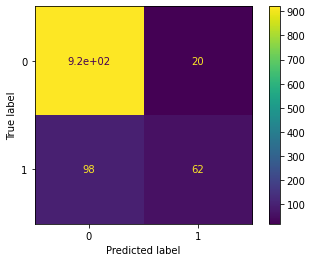

In [ ]:
clfk = KNeighborsClassifier(n_neighbors=5, weights='distance')
clfk.fit(X_train, y_train)

pk = clfk.predict(X_test)
print(classification_report(y_test, pk))
plot_confusion_matrix(clfk, X_test, y_test) 

## AUC ROC

In [ ]:
p1 = clfd.predict_proba(X_test)
p2 = clfr.predict_proba(X_test)
p3 = clfg.predict_proba(X_test)
p4 = clfk.predict_proba(X_test)

In [ ]:
# auc scores
auc_score1 = roc_auc_score(y_test, p1[:,1])
auc_score2 = roc_auc_score(y_test, p2[:,1])
auc_score3 = roc_auc_score(y_test, p3[:,1])
auc_score4 = roc_auc_score(y_test, p4[:,1])

print(auc_score1, auc_score2, auc_score3, auc_score4)

0.8687599734042553 0.9288430851063829 0.9160638297872339 0.8756183510638298


In [ ]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, p1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, p2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, p3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, p4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

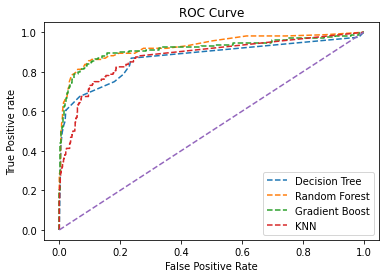

In [ ]:
plt.plot(fpr1, tpr1, linestyle='--', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--', label='Gradient Boost')
plt.plot(fpr4, tpr4, linestyle='--', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# Conclusion
## Steps to Retain Customers
* More Customer Service calls mean the customer is more prone to churn.
* Optimize the price of talk time for segment 1 customers.
* Introduce a data plan to those customers who are using data without data plans ASAP.
* Introduce exciting data plans to segment 1 customers.
* If the possible optimizing price of data plans can retain segment 2 customers also.


## Machine Learning Models
* Random Forest, Gradientboost are best.
* Gradientboost, decision tree, KNN are hyperparameter tuned. Random forest is not hyperparameter tuned.
* Random forest is working like gradient boost(tuned model) without hyperparameter tuning so it is the best algorithm because it has by default raw sampling procedure. 
* This case class imbalance is 85/15 % still it is not like <5% kind of case, so random forest will do best because of its default sampling procedure before applying special class imbalance strategies.

---